In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
# 데이터 불러오기
df_price = pd.read_excel('result.xlsx')
df_price.head()

,year_month,price,importation,slaughter
0,200001,17558,15869000,121079
1,200002,18150,16536000,62486
2,200003,18032,21996000,74258
3,200004,16916,18384000,68224
4,200005,16780,19097000,90450


In [77]:
# data,target 설정
data = df_price['year_month']
target = df_price['price']

In [78]:
print(data.shape)
print(target.shape)

(252,)
(252,)


In [79]:
# 계산하기 위해 2차원 배열로 변환
data = np.array(data).reshape(-1,1)

In [80]:
data

array([[200001],
       [200002],
       [200003],
       [200004],
       [200005],
       [200006],
       [200007],
       [200008],
       [200009],
       [200010],
       [200011],
       [200012],
       [200101],
       [200102],
       [200103],
       [200104],
       [200105],
       [200106],
       [200107],
       [200108],
       [200109],
       [200110],
       [200111],
       [200112],
       [200201],
       [200202],
       [200203],
       [200204],
       [200205],
       [200206],
       [200207],
       [200208],
       [200209],
       [200210],
       [200211],
       [200212],
       [200301],
       [200302],
       [200303],
       [200304],
       [200305],
       [200306],
       [200307],
       [200308],
       [200309],
       [200310],
       [200311],
       [200312],
       [200401],
       [200402],
       [200403],
       [200404],
       [200405],
       [200406],
       [200407],
       [200408],
       [200409],
       [200410],
       [200411

In [81]:
print(data.shape)

(252, 1)


### data split

In [82]:
train_data, test_data, train_target, test_target = train_test_split(
data, target, test_size=0.3
)

In [83]:
len(train_data), len(train_target), len(test_data), len(test_target)

(176, 176, 76, 76)

# Linear Regression

In [ ]:
model = LinearRegression()

In [179]:
# model 학습
model.fit(train_data, train_target)

LinearRegression()

In [86]:
# bias 값
model.intercept_

-1393486.135609171

In [87]:
# weight 값
model.coef_

array([7.09017538])

In [88]:
# 모델 예측
model.predict(test_data)

array([30986.81928108, 30299.07226939, 27455.91194272, 28122.38842827,
       36637.68905753, 28810.13543996, 35205.47363113, 30256.53121712,
       31710.01716966, 38091.17501007, 28179.1098313 , 32426.12488286,
       35226.74415726, 33851.25013389, 35240.92450802, 30937.18805343,
       28845.58631685, 36658.95958367, 37389.24764763, 31674.56629277,
       26030.78669169, 38757.65149563, 28164.92948054, 28852.67649223,
       38800.19254789, 25988.24563943, 37332.5262446 , 29547.5136793 ,
       30284.89191864, 27463.0021181 , 29597.14490695, 30277.80174326,
       33837.06978313, 38084.08483469, 29533.33332854, 25272.13792622,
       36630.59888215, 29568.78420543, 37353.79677073, 25286.31827698,
       26683.08282649, 32404.85435673, 35233.83433264, 37396.337823  ,
       38814.37289865, 27441.73159196, 29590.05473157, 37346.70659536,
       24605.66144067, 33822.88943237, 24598.57126529, 38062.81430856,
       31667.47611739, 31695.8368189 , 27392.10036432, 35964.1223966 ,
      

### 모델 평가

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)

train_mse = mean_squared_error(train_pred, train_target)
test_mse = mean_squared_error(test_pred, test_target)

In [91]:
print(train_mse)
print(test_mse)

76441927.71407837
69012333.24178104


In [92]:
# 가독성을 위해 rms 적용
print(train_mse**(1/2))
print(test_mse**(1/2))

8743.107440382873
8307.366203664134


In [93]:
print(train_pred[:10])
print(train_target[:10])

[29582.96455619 24556.03021302 30306.16244477 24619.84179143
 33142.23259606 28866.85684299 36687.32028518 25335.94950463
 38055.72413318 26044.96704245]
93     47812
0      17558
107    33880
9      16834
155    21000
80     38528
215    47230
22     22016
232    42950
34     30316
Name: price, dtype: int64


# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [113]:
data = df_price['year_month']
target = df_price['price']

In [114]:
data = np.array(data).reshape(-1,1)

In [115]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2022
)
print(len(train_data))
print(len(test_data))

176
76


In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [117]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [118]:
logit_regression = LogisticRegression()
logit_regression.fit(scaled_train_data, train_target)

LogisticRegression()

In [119]:
train_pred = logit_regression.predict(scaled_train_data)
test_pred = logit_regression.predict(scaled_test_data)

In [120]:
train_pred[:10]

array([31200, 21000, 22570, 31200, 22570, 22570, 31200, 31200, 21000,
       31200], dtype=int64)

In [121]:
train_target[:10]

68     37782
105    33956
155    21000
78     37142
193    28000
209    45750
25     30120
4      16780
120    30360
31     28836
Name: price, dtype: int64

### 정확도 측정

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)
print(f'train_acc is {train_acc:.2f}')
print(f'test_acc is {test_acc:.2f}')

train_acc is 0.08
test_acc is 0.08


# Hyperparameter

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
# 탐색범위 선정
params = [
          {"kernel":["linear"], "C":[10,30,100,300,1000,3000,10000,30000]},
          {
            "kernel":["rbf"],
            "C":[10, 30, 100, 300, 1000],
            "gamma":[0.03, 0.1, 0.3, 1.0, 3.0]
          }
]

In [126]:
params

[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
 {'kernel': ['rbf'],
  'C': [10, 30, 100, 300, 1000],
  'gamma': [0.03, 0.1, 0.3, 1.0, 3.0]}]

In [127]:
# 탐색 수행
from sklearn.svm import SVC
svm = SVC()
grid_cv = GridSearchCV(svm, params, cv=3, n_jobs=-1)
grid_cv.fit(scaled_train_data, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000],
                          'kernel': ['linear']},
                         {'C': [10, 30, 100, 300, 1000],
                          'gamma': [0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [128]:
# 결과
# Optimized parameter
grid_cv.best_params_

{'C': 10000, 'kernel': 'linear'}

In [129]:
# Optimized model
train_pred = grid_cv.best_estimator_.predict(scaled_train_data)
test_pred = grid_cv.best_estimator_.predict(scaled_test_data)

In [131]:
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)
print(f'best_train_acc is {best_train_acc:.2f}')
print(f'best_test_acc is {best_test_acc:.2f}')

best_train_acc is 0.81
best_test_acc is 0.22


# Boosting_Regression

In [132]:
!pip install catboost

In [133]:
data, target = df_price["year_month"], df_price["price"]

### 1.Data Split

In [147]:
data = np.array(data).reshape(-1,1)

In [150]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

## 2. XGBoost

In [136]:
!pip install xgboost

In [151]:
import xgboost as xgb


xgb_reg = xgb.XGBRegressor()

### 2.1 학습

In [152]:
xgb_reg.fit(train_data, train_target)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 2.2 예측

In [153]:
xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

Text(0, 0.5, 'target')

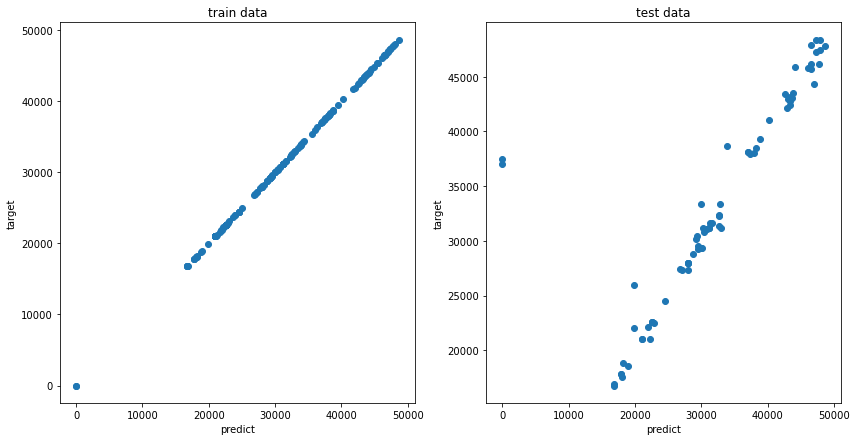

In [154]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 2.3 평가

In [155]:
from sklearn.metrics import mean_squared_error

xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

In [172]:
print(f"XGBoost Train MSE is {xgb_train_mse**(1/2):.4f}")
print(f"XGBoost Test MSE is {xgb_test_mse**(1/2):.4f}")

XGBoost Train MSE is 32.0508
XGBoost Test MSE is 6163.3600


## 3. Light GBM

In [157]:
!pip install lightgbm

In [159]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()

### 3.1 학습

In [160]:
lgb_reg.fit(train_data, train_target)

LGBMRegressor()

### 3.2 예측

In [161]:
lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

Text(0, 0.5, 'target')

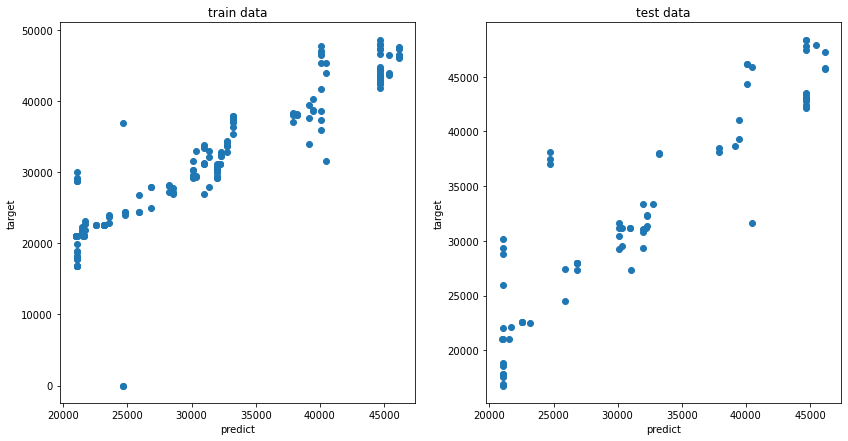

In [162]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 3.3 평가

In [163]:
lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

In [173]:
print(f"Light Boost Train MSE is {lgb_train_mse**(1/2):.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse**(1/2):.4f}")

Light Boost Train MSE is 3923.3318
Light Boost Test MSE is 3945.4330


## 4. CatBoost

In [165]:
import catboost as cb


cb_reg = cb.CatBoostRegressor()

### 4.1 학습

In [166]:
cb_reg.fit(train_data, train_target, verbose=False)

### 4.2 예측

In [167]:
cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

Text(0, 0.5, 'target')

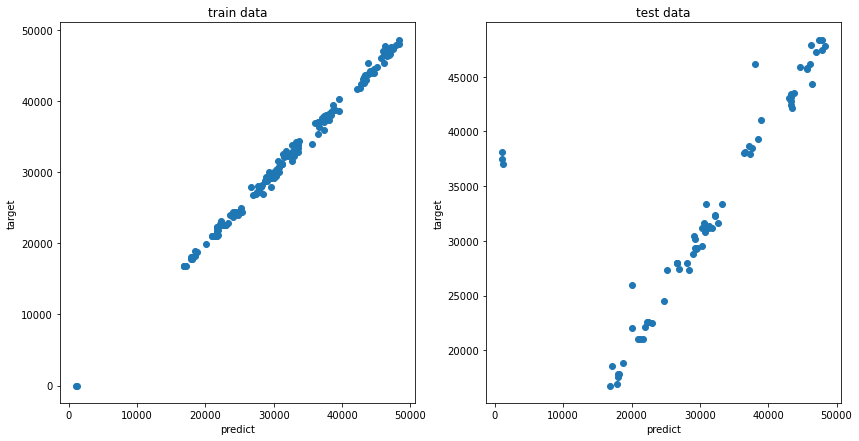

In [168]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target")

### 4.3 평가

In [169]:
cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)

In [174]:
print(f"Cat Boost Train MSE is {cb_train_mse**(1/2):.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse**(1/2):.4f}")

Cat Boost Train MSE is 543.6061
Cat Boost Test MSE is 7383.7574


## 5. 마무리

In [177]:
print(f"XGBoost Test MSE is {xgb_test_mse**(1/2):.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse**(1/2):.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse**(1/2):.4f}")

XGBoost Test MSE is 6163.3600
Light Boost Test MSE is 3945.4330
Cat Boost Test MSE is 7383.7574
